# Example 3.4: Spectral density of white noise and narrowbanded processes

In this example, we will consider two spectral densities with completely different frequency characteristics.

## Auto spectral density of white noise

The first type of process is what we call *white noise*. This has a constant (two-sided) auto spectral density:

$$
S(\omega) 
= \left\{ \begin{array} a \frac{1}{2}  \sigma_x^2 / (\omega_2) & \quad 
-\omega_2 \leq \omega \leq \omega_2
\\ 0 & \quad \text{elsewhere} \end{array} \right.
$$

Here, the constant $\omega_2$ is an upper cut-off frequency which, in theory, should go to infinity. Since, in practice, we cannot extend the spectrum to infinity, we are technically considering what we call *band-limited white noise* or a *rectangular spectrum*.

We set $\sigma_x=10$ in this example. Let's start by plotting the spectral density. 

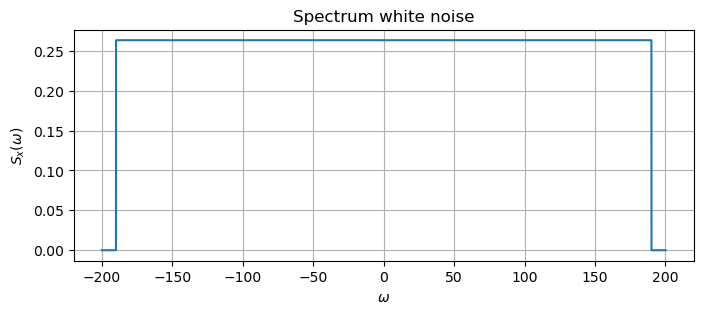

In [9]:
import numpy as np
from matplotlib import pyplot as plt

# Frequency axis
domega=0.01
omega_max=200
omega = np.arange(-omega_max,omega_max+domega,domega)

omega2 = 190.0 # Upper cut-off frequency
sigma_x= 10.0 # Standard deviation of the process

# Fill spectral density
S_wn=np.zeros_like(omega)
S_wn[(np.abs(omega) < omega2)] = 0.5*sigma_x**2/(omega2)

plt.figure(figsize=(8,3))
plt.plot(omega,S_wn)
plt.title('Spectrum white noise')
plt.ylabel(r'$S_x(\omega)$')
plt.xlabel(r'$\omega$')
plt.grid()

The plot shows that this process consists all frequencies (up to the cut-off frequency $\omega_2 \rightarrow \infty$). This makes it very broadbanded.

## Auto correlation of white noise

Plotting the auto correlation function can give more insight into the characteristics of white noise.

$$
R(\tau)=
\int_{-\infty}^{\infty}
S(\omega) \exp({-i \omega \tau}) \: \text{d} \omega
$$

It is possible to solve this analytically, but we will use numerical integration.

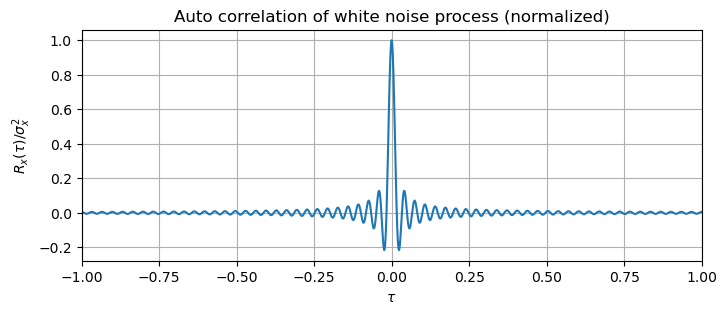

In [10]:
tau=np.arange(-2,2,0.002) # Time lag axis

# Solve inverse FT integral for each tau
R_wn = np.zeros(tau.shape[0])
for k in range(tau.shape[0]):
    R_wn[k] = np.real(np.trapezoid(S_wn*np.exp(1j*omega*tau[k]),omega))

# Plot auto correlation
plt.figure(figsize=(8,3))
plt.plot(tau,R_wn/sigma_x**2)
plt.title('Auto correlation of white noise process (normalized)')
plt.ylabel(r'$R_x(\tau) / \sigma_x^2$')
plt.xlabel(r'$\tau$')
plt.xlim(-1,1)
plt.grid()

Wee see that the normalized correlation is equal to 1 for $\tau=0$ (as expected), but it quickly drops off. The small oscillations are due to the fact that we have given $\omega_2$ a finite value. In theory, when  $\omega_2 \rightarrow  \infty$, the auto correlation function will be a single peak equal to $\sigma_x^2$ at $\tau=0$, and zero elsewhere. This can be expressed as:

$$
R(\tau)=\sigma_x^2 \delta(\tau)
$$

where $\delta(\tau)$ is the mathematical Dirac delta function.

## Simulated time series of white noise

We will now simulate white noise using the method of the cross-covariance matrix from Example 2_1. Here again, we use a $N\times N$ covariance matrix that describes the correlation between all time samples:

$$\mathbf{\Sigma} _{\mathbf{X}_1}^2 = \left[ {\begin{array}{cc}
{{R_{{X_1}}}(0)}&{{R_{{X_1}}}({t_1} - {t_2})}& \cdots &{{R_{{X_1}}}({t_1} - {t_N})}\\
{{R_{{X_1}}}({t_2} - {t_1})}&{{R_{{X_1}}}(0)}& \cdots &{{R_{{X_1}}}({t_2} - {t_N})}\\
 \vdots & \vdots & \ddots & \vdots \\
{{R_{{X_1}}}({t_N} - {t_1})}&{{R_{{X_1}}}({t_N} - {t_2})}& \cdots &{{R_{{X_1}}}(0)}
\end{array}} \right]$$



*Note*: we might get some error messages from python. This is because the process is highly correlated, and leads to an almost singular covariance matrix. We will ignore these messages as this simulation method is just an example. This is not the best method to simulate stochastic processes, and other improved methods will be shown in later examples.



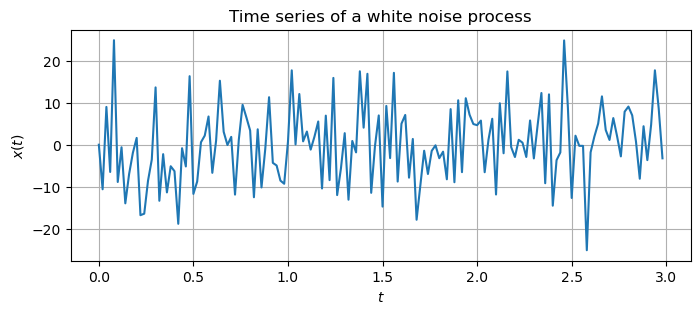

In [11]:
t=np.arange(0,3,0.02) # Time axis

N=len(t)

tau_mat = np.abs(np.array([t])-np.array([t]).T) # Matrix of all possible time lags
mean = np.zeros((t.shape[0])) # Vector of mean values 

# Assign cross-covariance matrix for elements between all time lags
cov_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
            
        # Find the closest time in the auto-correlation vector
        closest_index = np.argmin(np.abs(tau - tau_mat[i,j]))
            
        # Assign the corresponding covariance value
        cov_matrix[i, j] = R_wn[closest_index]

# Simulate time series 
x = np.random.multivariate_normal(mean,cov_matrix)

# Plot time series
plt.figure(figsize=(8,3))
plt.title('Time series of a white noise process')
plt.plot(t,x)
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid()


We see that the time series is highly chaotic. This matches the autocorrelation function, which tells us that there is no correlation between data points, even those that are adjacent to each other. This is similar to drawing normal distributed random numbers for each time step, completely independent of previous time steps.

We can plot the covariance matrix matrix, which will confirm that each data point is uncorrelated to all others.

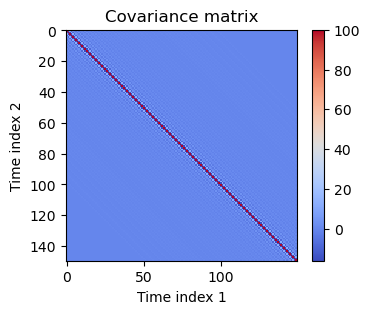

In [12]:
# Plotting the covariance matrix
plt.figure(figsize=(4, 3))
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Covariance matrix')
plt.xlabel('Time index 1')
plt.ylabel('Time index 2')
plt.show()


## Auto spectral density of a narrrowbanded process

We now consider a totally opposite process, namely the one that is narrowbanded. It is non-zero only for a small interval between $\omega_1$ and $\omega_2$. It therefore contains only one narrow band of frequencies.

$$
S(\omega) 
= \left\{ \begin{array}  a \frac{1}{2}  \sigma_x^2 / (\omega_2-\omega_1) & \quad 
\omega_1 \leq | \omega | \leq \omega_2
\\ 0 & \quad \text{elsewhere} \end{array} \right.
$$

$\omega_1$ and $\omega_2$ are the lower and upper cut-off frequencies.


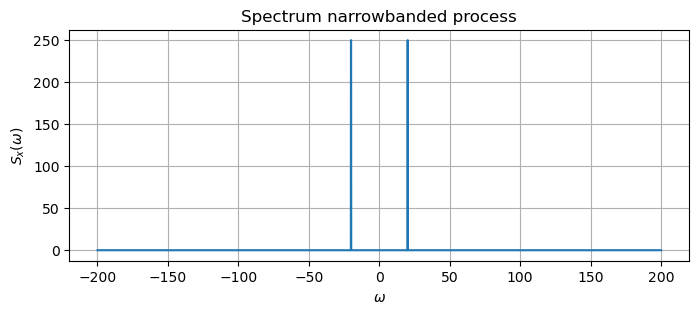

In [13]:
omega1 = 20.0 # Low cut-off frequency
omega2 = 20.2 # Upper cut-off frequency
sigma_x= 10.0 # Standard deviation of the process

S_nb=np.zeros_like(omega)
S_nb[(np.abs(omega) < omega2) & (np.abs(omega) > omega1)] = 0.5*sigma_x**2/(omega2-omega1)

plt.figure(figsize=(8,3))
plt.plot(omega,S_nb)
plt.title('Spectrum narrowbanded process')
plt.ylabel(r'$S_x(\omega)$')
plt.xlabel(r'$\omega$')
plt.grid()

## Auto correlation of  a narrrowbanded process



We can also look at the auto correlation of this process.

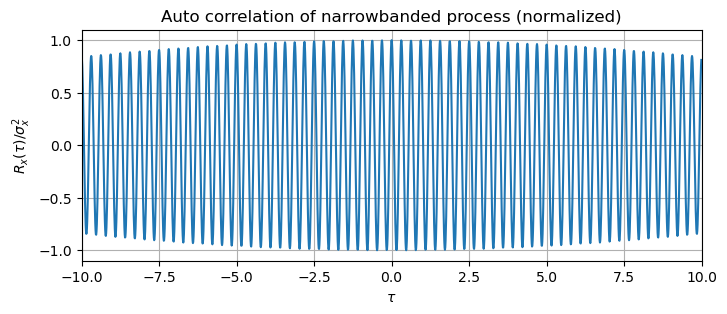

In [14]:
tau=np.arange(-10,10,0.01) # Time lag axis

# Calculate inverse FT integral for each tau
R_nb = np.zeros(tau.shape[0])
for k in range(tau.shape[0]):
    R_nb[k] = np.real(np.trapezoid(S_nb*np.exp(1j*omega*tau[k]),omega))

# Plot auto correlation
plt.figure(figsize=(8,3))
plt.plot(tau,R_nb/sigma_x**2)
plt.title('Auto correlation of narrowbanded process (normalized)')
plt.ylabel(r'$R_x(\tau) / \sigma_x^2$')
plt.xlabel(r'$\tau$')
plt.xlim(-10,10)
plt.grid()

We see that the correlation is cyclic, with a frequency equal to the frequency band in the spectrum. When the bandwidth $\Delta \omega=\omega_2-\omega_1$ becomes very small, the stochastic process will look like a single cosine-wave that changes amplitude very slowly.

We can confirm this by simulating a time series.

## Simulated time series of a narrowbanded process

Try changing $\omega_1$ and $\omega_2$ to produce different band widths, and see how the simulated time series change.



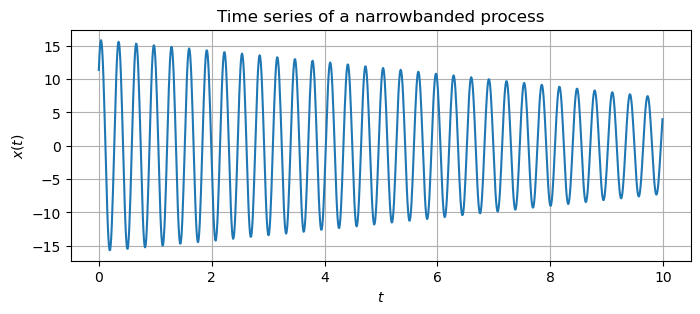

In [15]:
t=np.arange(0,10,0.01) # Time axis

N=len(t)

tau_mat = np.abs(np.array([t])-np.array([t]).T) # Matrix of all possible time lags
mean = np.zeros((t.shape[0])) # Vector of mean values 

# Assign cross-covariance matrix between all time lags
cov_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
            
        # Find the closest time in the time vector
        closest_index = np.argmin(np.abs(tau - tau_mat[i,j]))
            
        # Assign the corresponding covariance value
        cov_matrix[i, j] = R_nb[closest_index]

# Simulate time series 
x = np.random.multivariate_normal(mean,cov_matrix) # Simulate the points

plt.figure(figsize=(8,3))
plt.title('Time series of a narrowbanded process')
plt.plot(t, x)
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid()

A narrowbanded process tend to look like a single cosine wave with a given frequency, but with a changing amplitude.

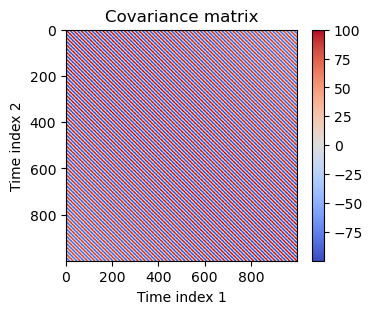

In [16]:
# Plotting the covariance matrix
plt.figure(figsize=(4, 3))
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Covariance matrix')
plt.xlabel('Time index 1')
plt.ylabel('Time index 2')
plt.show()